In [1]:
import gymnasium as gym
from gymnasium import spaces
import json
import copy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from scheduler_env.figure_env import SchedulingEnv

In [3]:
import warnings
# 특정 경고를 무시하도록 필터를 설정합니다.
warnings.filterwarnings("ignore", category=Warning)

In [4]:
env = SchedulingEnv(machine_config_path= "instances/Machines/v0-2.json", job_config_path = "instances/figure/job3.json", job_repeats_params = [(2, 1)] * 3, test_mode=True)

Job Job 3-0 is done
500 600
Job Job 3-0 is done
500 600
Job 1 - Repeat 2 : ETD = -1.75, D = 12
Job 1 - Repeat 1 : ETD = -2.0, D = 9
Job 2 - Repeat 1 : ETD = -1.5, D = 8
Job 2 - Repeat 2 : ETD = -1.6, D = 11
Job 3 - Repeat 2 : ETD = -1.833333333333333, D = 10
Job 3 - Repeat 1 : ETD = -1.0, D = 6
finish_time 600
[-175.0, -200.0, -150.0, -160.0, -183.33333333333331, -100]


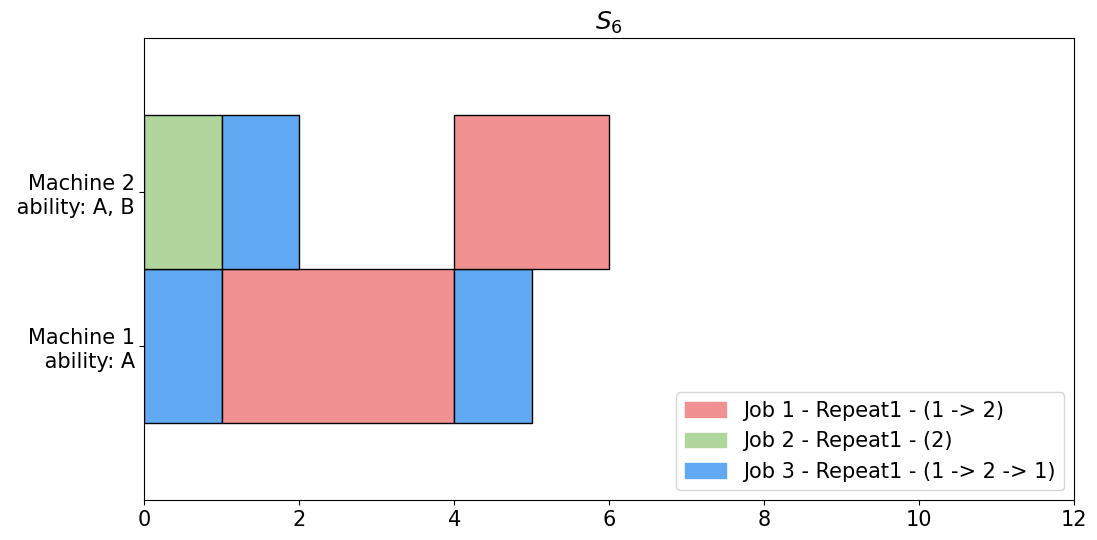

Job Job 3-0 is done
500 600
Job 1 - Repeat 1 : ETD = -0.5, D = 9
Job 1 - Repeat 2 : ETD = -0.8333333333333335, D = 12
Job 2 - Repeat 1 : ETD = -1.5, D = 8
Job 2 - Repeat 2 : ETD = -1.6, D = 11
Job 3 - Repeat 2 : ETD = -1.833333333333333, D = 10
Job 3 - Repeat 1 : ETD = -1.0, D = 6
finish_time 900
[-50.0, -83.33333333333334, -150.0, -160.0, -183.33333333333331, -100]


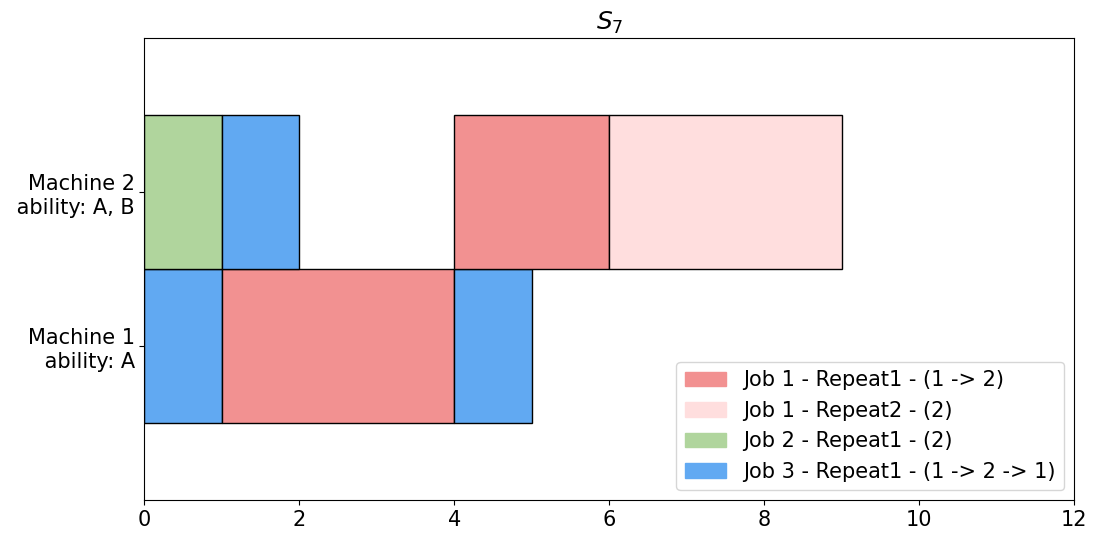

IndexError: list index out of range

In [5]:
step = 0
obs, info = env.reset()
#print(info['schedule_buffer'])

# actions = [(2, 2), (3, 1), (2, 1), (1, 1), (1, 2), (3, 1), (3, 2)]
# actions = [(1, 1), (2, 2), (2, 1), (2, 2), (2, 2), (2, 1), (3, 2), (2, 1), (1, 1)]
actions = [(3, 1), (2, 2), (3, 2), (1, 1), (3, 1), (1, 2), (1, 2)]
J = 3
M = 2

while True:
    action = actions[step]
    action = (action[0] - 1) + (action[1] - 1) * J
    # action = env.action_space.sample()
    # print(action)
    
    step += 1
    obs, reward, terminated, truncated, info = env.step(action)
    # print(f"action : {action // 3}, {action % 3}")
    # print(info['schedule_buffer'])
    # env.visualize_graph()
    done = terminated or truncated
    et = list(map(lambda x: x / 100, info['job_estimated_tardiness']))
    # print(f'Job 1 ET : {et[0], et[1]}')
    # print(f'Job 2 ET : {et[2], et[3]}')
    # print(f'Job 3 ET : {et[4], et[5]}')
    # print('job_deadline', info['job_deadline'])
    # print(f'Action mask : {info["action_mask"]}')
    
    if step in (6, 7):
        for job_list in info['jobs']:
            for job in job_list:
                print(f'{job.name} - Repeat {job.index + 1} : ETD = {job.estimated_tardiness / 100}, D = {job.deadline // 100}')
        print('finish_time', info['finish_time'])
        print(info['job_estimated_tardiness'])
        # print(info['job_estimated_tardiness'])
        env.render()
    
    
    if done:
        break